In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
# Mengimpor dataset
dataset = pd.read_csv('Data/obesity_data.csv')
dataset.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


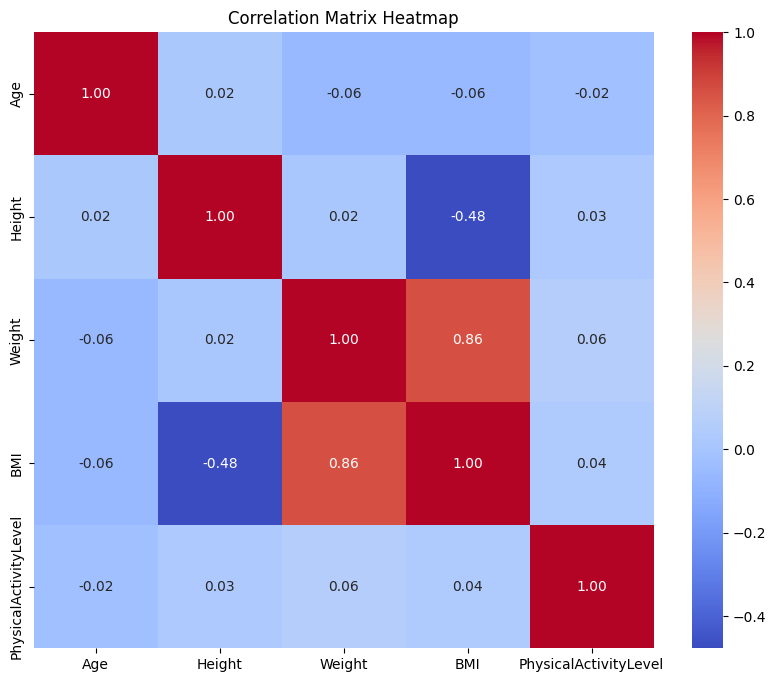

In [5]:
from matplotlib import pyplot as plt
# Exclude non-numeric columns from the correlation matrix
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

# Plot heatmap untu matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
# Misalkan 'kolom_angka' adalah kolom yang mengandung angka dalam format string dengan koma
# Anda harus mengganti 'kolom_angka' dengan nama sebenarnya dari kolom tersebut dalam DataFrame Anda
#dataset['Height'] = dataset['Height'].str.replace(',', '.')
#dataset['Weight'] = dataset['Weight'].str.replace(',', '.')
#dataset['BMI'] = dataset['BMI'].str.replace(',', '.')
# Kemudian, ubah tipe data kolom menjadi float
#dataset['Height'] = dataset['Height'].astype(float)


In [7]:
# Mengubah kolom tipe kategorik menjadi numerik
label_encoder = LabelEncoder()

dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['ObesityCategory'] = label_encoder.fit_transform(dataset['ObesityCategory'])

dataset

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,2
996,35,0,165.076490,97.639771,35.830783,1,1
997,49,0,156.570956,78.804284,32.146036,1,1
998,64,1,164.192222,57.978115,21.505965,4,0


In [8]:
# Split data menjadi features (X) dan target variable (y)
X = dataset.iloc[:, :6].values 
y = dataset.iloc[:, 6].values  

In [9]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah output layer
MesinKlasifikasi.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size=10, epochs=100)

# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Mengubah nilai probabilitas menjadi kelas

Epoch 1/100
80/80 [==============================] - 0s 553us/step - loss: 1.5890 - accuracy: 0.3738
Epoch 2/100
80/80 [==============================] - 0s 502us/step - loss: 1.4783 - accuracy: 0.3738
Epoch 3/100
80/80 [==============================] - 0s 517us/step - loss: 1.2461 - accuracy: 0.5125
Epoch 4/100
80/80 [==============================] - 0s 512us/step - loss: 1.0071 - accuracy: 0.6525
Epoch 5/100
80/80 [==============================] - 0s 531us/step - loss: 0.8426 - accuracy: 0.6925
Epoch 6/100
80/80 [==============================] - 0s 510us/step - loss: 0.7416 - accuracy: 0.7362
Epoch 7/100
80/80 [==============================] - 0s 504us/step - loss: 0.6679 - accuracy: 0.7738
Epoch 8/100
80/80 [==============================] - 0s 504us/step - loss: 0.6070 - accuracy: 0.7962
Epoch 9/100
80/80 [==============================] - 0s 513us/step - loss: 0.5479 - accuracy: 0.8062
Epoch 10/100
80/80 [==============================] - 0s 542us/step - loss: 0.4897 - accura

In [12]:
# Menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.97


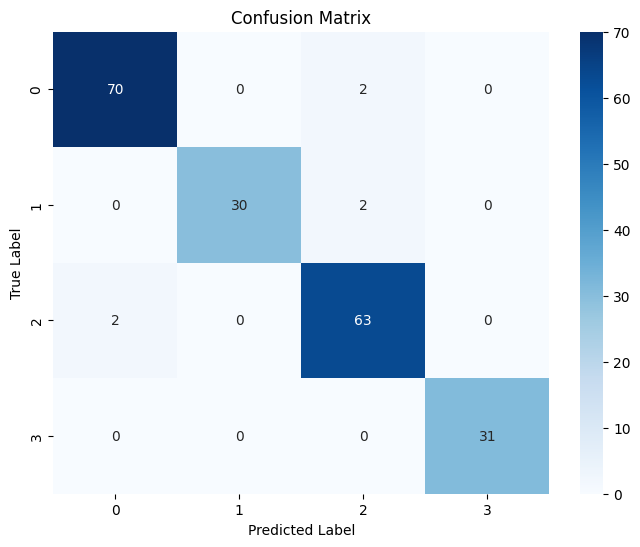

In [13]:
# Membuat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()